In [18]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [19]:
#read in character deaths dataset
url1 = "https://raw.githubusercontent.com/allisonyanc/Viz-Group-Project/master/got_deaths_updated.csv"
deaths = pd.read_csv(url1)
deaths.head(5)

,name,role,death_season,death_episode,execution,execution_type,likelihoodOfReturn,likelihoodOfReturn_notes,deathFlashback,execution types
0,Will,Ranger of the Nights Watch,1.0,1,Beheaded for desertion by Ned Stark,beheading,0%,NaN,NaN,stab
1,Jon Arryn,Hand to the King before Ned Stark,1.0,1,Poisoned by Lysa Arryn and Littlefinger,poison,0%,NaN,NaN,poison
2,NaN,NaN,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,4,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#drop unwanted columns

deaths.drop(['role','execution', 'likelihoodOfReturn','likelihoodOfReturn_notes',
          'deathFlashback','execution types'], axis=1, inplace=True)

In [12]:
#read in viewership & ratings dataset
url2 = "https://raw.githubusercontent.com/allisonyanc/Viz-Group-Project/master/Viewership%20%26%20Rating.csv"

view_rat = pd.read_csv(url2)
view_rat.head(5)

,Season,Episode,Viewers (millions),Ratings
0,1,1,2.22,9.0
1,1,2,2.20,8.8
2,1,3,2.44,8.7
3,1,4,2.45,8.8
4,1,5,2.58,9.1


In [45]:
view_rat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 5 columns):
Season                66 non-null int64
Episode               66 non-null int64
Viewers (millions)    66 non-null float64
Ratings               66 non-null float64
seas_epi              66 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 3.1+ KB


## Part I: Data Wrangling

In [34]:
comb = deaths.merge(view_rat, how='outer', left_on = ['death_season', 'death_episode'], right_on = ['Season', 'Episode'])
comb.head(3)

,name,death_season,death_episode,execution_type,Season,Episode,Viewers (millions),Ratings
0,Will,1,1.0,beheading,1.0,1.0,2.22,9.0
1,Jon Arryn,1,1.0,poison,1.0,1.0,2.22,9.0
2,NaN,1,2.0,NaN,1.0,2.0,2.20,8.8


In [16]:
death_by_ep = comb.groupby(['Season', 'Episode']).agg({'name': 'count', 'Viewers (millions)': 'max', 'Ratings':'max'} ).rename(columns = {'name': 'Number of Deaths'}).reset_index()

In [24]:
methods = pd.get_dummies(deaths, columns=['execution_type'])

In [22]:
comb_methods = methods.merge(view_rat, how='outer', left_on = ['death_season', 'death_episode'], right_on = ['Season', 'Episode'])

In [35]:
death_by_method_seas = comb.groupby(['Season', 'execution_type']).agg({'name': 'count', 'Viewers (millions)': 'mean', 'Ratings':'mean'} ).rename(columns = {'name': 'Number of Deaths'}).reset_index()

In [36]:
death_by_method = comb.groupby('execution_type').agg({'name': 'count', 'Viewers (millions)': 'mean', 'Ratings':'mean'} ).rename(columns = {'name': 'Number of Deaths', 'Ratings':'Average Ratings', 'Viewers (millions)':'Average Viewers (millions)'}).reset_index()

## Part II: Visualize deaths by season and type of deaths

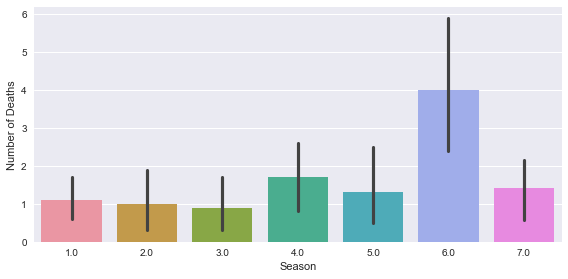

In [27]:
sns.factorplot(y='Number of Deaths', data=death_by_ep, x='Season',aspect=2, kind='bar')

It looks like the seasons didn't necessarily get more deadly, but that season 6 (especially episode 10) was very deadly.

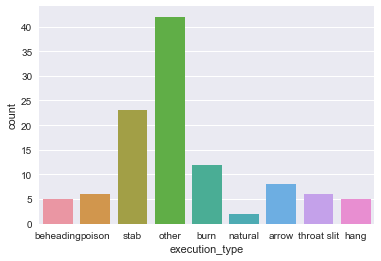

In [28]:
sns.countplot(x='execution_type', data=deaths)

Breakdown of deaths by method shows that stabbing and burning are the most popular ways to kill (besides 'other' which is to be expected since it's probably a variety of non-traditional methods)

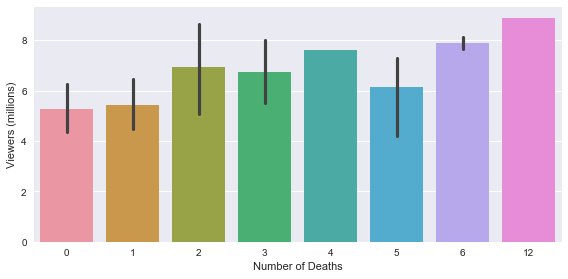

In [29]:
sns.factorplot(y='Viewers (millions)', data=death_by_ep, x='Number of Deaths',aspect=2, kind='bar')

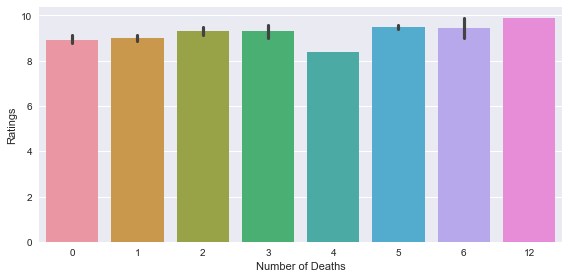

In [30]:
sns.factorplot(y='Ratings', data=death_by_ep, x='Number of Deaths',aspect=2, kind='bar')

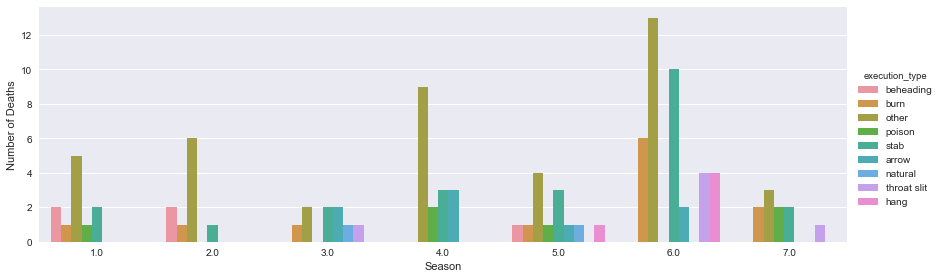

In [37]:
sns.factorplot(x='Season', y='Number of Deaths',hue='execution_type', data=death_by_method_seas, kind='bar',aspect=3)

Number of deaths by type and by season show that season 6, besides being the most deadly season, had a lot bigger proportion of stabbings and burnings than the other seasons.  

In [38]:
#groupby and create new column with season & episode together:
gb = view_rat.groupby(['Season', 'Episode']).agg({'Viewers (millions)': 'max', 'Ratings': 'max'}).reset_index()

gb['seas_epi'] = gb['Season'].astype(str) + '.' + gb['Episode'].astype(str)
gb['seas_epi'].astype('float').head(5)

0    1.1
1    1.2
2    1.3
3    1.4
4    1.5
Name: seas_epi, dtype: float64

In [11]:
gb.head(5)

,Season,Episode,Ratings,Viewers (millions),seas_epi
0,1,1,9.0,2.22,1.1
1,1,2,8.8,2.20,1.2
2,1,3,8.7,2.44,1.3
3,1,4,8.8,2.45,1.4
4,1,5,9.1,2.58,1.5


## Part III: Visualize progression of deaths, viewership, and ratings over time

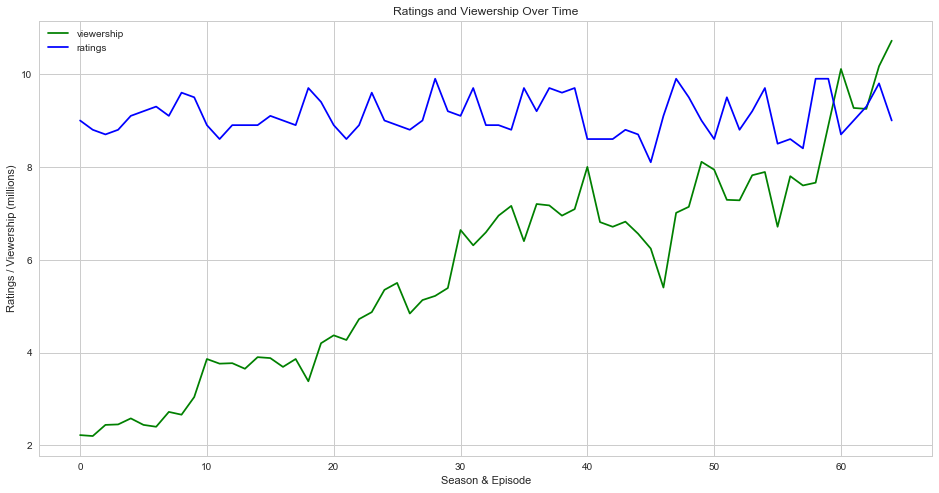

In [7]:
x = gb.index[:65]
x
y = gb['Viewers (millions)'][:65]
y
z = gb['Ratings'][:65]

sns.set_style("whitegrid")

plt.figure(figsize=(16,8))
plt.plot(x, y, color='g', label='viewership')
plt.plot(x, z, color='b', label='ratings')

plt.title("Ratings and Viewership Over Time")
plt.xlabel("Season & Episode")
plt.ylabel("Ratings / Viewership (millions)")

plt.legend()

We want to see during which season and episode(s) the big dip in the line graphs above occurred:

In [66]:
gb.loc[40:50]

,Season,Episode,Ratings,Viewers (millions),seas_epi
40,5,1,8.6,8.00,5.1
41,5,2,8.6,6.81,5.2
42,5,3,8.6,6.71,5.3
43,5,4,8.8,6.82,5.4
44,5,5,8.7,6.56,5.5
45,5,6,8.1,6.24,5.6
46,5,7,9.1,5.40,5.7
47,5,8,9.9,7.01,5.8
48,5,9,9.5,7.14,5.9
49,5,10,9.0,8.11,5.10


It looks like the dip in ratings was season 5 episode 6, and the dip in viewership was season 5 episode 7.  It makes sense that the dip in viewership immediately followed the dip in ratings rather than occurring simultaneously.  Also, it is interesting to note that once the viewership drops, it takes a while (almost 10 episodes) for it to recover.

A quick online search for more context shows that season 5 episode 6 ended in a highly controversial and violent scene that, according to online reviewers, seemed to trivialize the issue of rape and it was an overly extreme scene to include, even for Game of Thrones.

In [9]:
gb_deaths = deaths.groupby(["death_season", "death_episode"]).agg({"name_dead": "count"}).rename(columns = {"name_dead":"number_deaths"}).reset_index()
gb_deaths.head(5)

,death_season,death_episode,number_deaths
0,1.0,1,2
1,1.0,2,0
2,1.0,3,0
3,1.0,4,0
4,1.0,5,1


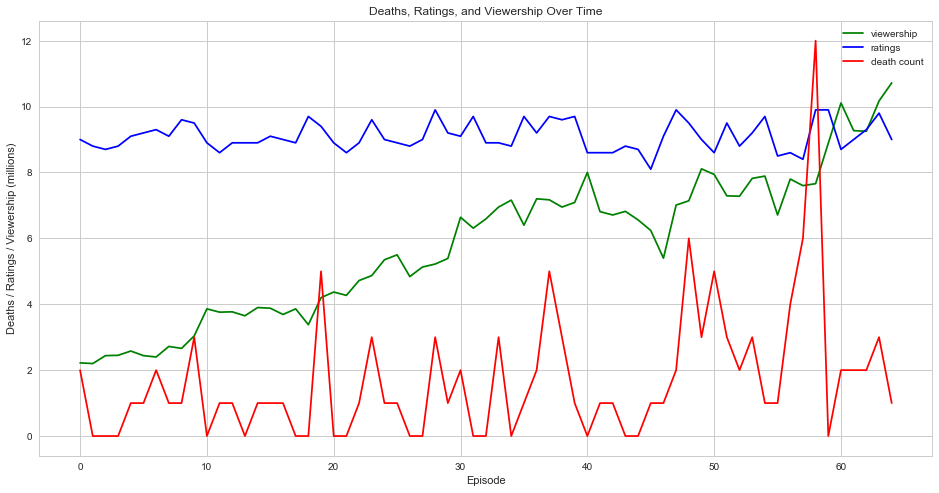

In [93]:
d = gb_deaths["number_deaths"]

plt.figure(figsize=(16,8))
plt.plot(x, y, color='g', label = "viewership")
plt.plot(x, z, color='blue', label = "ratings")
plt.plot(x, d, color='r', label = "death count")

plt.title("Deaths, Ratings, and Viewership Over Time")
plt.xlabel("Episode")
plt.ylabel("Deaths / Ratings / Viewership (millions)")

plt.legend()

In [10]:
#find the season & episode with the big spike in deaths:

gb_deaths.loc[55:60]

,death_season,death_episode,number_deaths
55,6.0,7,1
56,6.0,8,4
57,6.0,9,6
58,6.0,10,12
59,7.0,1,0
60,7.0,2,2


We see that season 6 episode 10 had the big spike in death count.  This episode also had high ratings.

Initially when we glance at the graph above, it looks like the spikes in death count align perfectly with the spikes in ratings, which would mean they occur in the same episodes.  However, if we look at the numbers, sometimes it doesn't actually align perfectly, so a high death count does not necessarily mean a high rating for the episode.